In [3]:
###Our team plans to analyze the data from 2018 to 2021 separately according to several key nodes of the epidemic, and I am responsible for processing and analyzing the data before the epidemic
###Before analyzing the data, I have to clean the dataframe. Followings are the cleaning tips:
#1）Remove ones who are not 'User'.
#2) Remove ones without 'ExternalID' and 'DateOfBirth'.
#3) Remove ones who are under 18 years old.
#4) Remove useless and distracting information.
#5) Merge the data to make them look simplify.

###At the beginning, import panda and read the csv. documents.
import pandas as pd
data1 = pd.read_csv("CCDate2018-2020.3.csv")
data2 = pd.read_csv("Users2021.csv")
data3 = pd.read_csv("CustomerMedicalConditions.csv")

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
###In order to focus on the analysis of user data, I clean up data except 'User' in 'Role'.
import numpy
data1_ = data1[data1['Role'] == 'User']
data1_.index = range(data1_.shape[0])
data1_

,Time,VisitorID,ExternalID,Role,Location,Link Title,Link Type,ContentInfo,URL
0,3/22/20 11:59 PM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,Single Player Games,Category,NaN,NaN
1,3/22/20 11:58 PM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,Tablet Games,Category,NaN,NaN
2,3/22/20 11:58 PM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,Single Player Games,Category,NaN,NaN
3,3/22/20 11:58 PM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,Play Games,Category,NaN,NaN
4,3/22/20 11:10 PM,F7331B56-15F0-4793-9E09-5D9E2510A053,5325.0,User,Broom Court,My Music,Category,NaN,NaN
...,...,...,...,...,...,...,...,...,...
330661,1/28/19 1:21 PM,7925C5CE-A0B8-473D-BEFF-5D2D9C9C6FE6,5541.0,User,St Leonards Court,Game of Thrones,TV,NaN,https://www.hbo.com/game-of-thrones
330662,1/28/19 1:20 PM,7925C5CE-A0B8-473D-BEFF-5D2D9C9C6FE6,5541.0,User,St Leonards Court,Game of Thrones YouTube,TV,NaN,https://www.youtube.com/user/GameofThrones
330663,1/28/19 1:19 PM,7925C5CE-A0B8-473D-BEFF-5D2D9C9C6FE6,5541.0,User,St Leonards Court,Game of Thrones,TV,NaN,https://www.hbo.com/game-of-thrones
330664,1/28/19 12:36 PM,28C0D378-84E4-41B6-A54F-52968373A34A,5709.0,User,Edinburgh East Abbey C@H,Game of Thrones YouTube,TV,NaN,https://www.youtube.com/user/GameofThrones


In [5]:
###Remove ones without ExternalID in data1
newdata1 = data1_.dropna(axis = 0, subset = ["ExternalID"] )
print(newdata1)
newdata1.shape[0]

                    Time                             VisitorID  ExternalID  \
0       3/22/20 11:59 PM  112FA96F-1BD2-4673-BFE8-ADF5478493D3      5535.0   
1       3/22/20 11:58 PM  112FA96F-1BD2-4673-BFE8-ADF5478493D3      5535.0   
2       3/22/20 11:58 PM  112FA96F-1BD2-4673-BFE8-ADF5478493D3      5535.0   
3       3/22/20 11:58 PM  112FA96F-1BD2-4673-BFE8-ADF5478493D3      5535.0   
4       3/22/20 11:10 PM  F7331B56-15F0-4793-9E09-5D9E2510A053      5325.0   
...                  ...                                   ...         ...   
330661   1/28/19 1:21 PM  7925C5CE-A0B8-473D-BEFF-5D2D9C9C6FE6      5541.0   
330662   1/28/19 1:20 PM  7925C5CE-A0B8-473D-BEFF-5D2D9C9C6FE6      5541.0   
330663   1/28/19 1:19 PM  7925C5CE-A0B8-473D-BEFF-5D2D9C9C6FE6      5541.0   
330664  1/28/19 12:36 PM  28C0D378-84E4-41B6-A54F-52968373A34A      5709.0   
330665  1/28/19 12:07 PM  D72E5BD0-966E-4E59-BD31-143527623B79      5542.0   

        Role                  Location               Link Title

280354

In [6]:
###In order to add gender and birthday information to the dataframe (Maybe we can analyze them later),
###Use merge() function to do left join with the common column: "ExternalID".
data1_2 = pd.merge(newdata1, data2, how = "left", on = ["ExternalID"])
data1_2

,Time,VisitorID_x,ExternalID,Role,Location_x,Link Title,Link Type,ContentInfo,URL,User ID,VisitorID_y,Birth date,Gender,Location_y
0,3/22/20 11:59 PM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,Single Player Games,Category,NaN,NaN,1416,E87F7029-5A43-4DF4-A513-1E35EF2936CB,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
1,3/22/20 11:58 PM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,Tablet Games,Category,NaN,NaN,1416,E87F7029-5A43-4DF4-A513-1E35EF2936CB,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
2,3/22/20 11:58 PM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,Single Player Games,Category,NaN,NaN,1416,E87F7029-5A43-4DF4-A513-1E35EF2936CB,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
3,3/22/20 11:58 PM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,Play Games,Category,NaN,NaN,1416,E87F7029-5A43-4DF4-A513-1E35EF2936CB,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
4,3/22/20 11:10 PM,F7331B56-15F0-4793-9E09-5D9E2510A053,5325.0,User,Broom Court,My Music,Category,NaN,NaN,609,A81B2A0C-7638-4756-A44C-AA4592FA7BD6,NaN,Female,National/North/Stirling Council/Broom Care Hom...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280349,1/28/19 1:21 PM,7925C5CE-A0B8-473D-BEFF-5D2D9C9C6FE6,5541.0,User,St Leonards Court,Game of Thrones,TV,NaN,https://www.hbo.com/game-of-thrones,1417,D067EF52-189E-46F8-AD3D-BA51F8B2C78A,2/18/54 12:00 AM,Male,National/WEST /South Ayrshire Council/South Ay...
280350,1/28/19 1:20 PM,7925C5CE-A0B8-473D-BEFF-5D2D9C9C6FE6,5541.0,User,St Leonards Court,Game of Thrones YouTube,TV,NaN,https://www.youtube.com/user/GameofThrones,1417,D067EF52-189E-46F8-AD3D-BA51F8B2C78A,2/18/54 12:00 AM,Male,National/WEST /South Ayrshire Council/South Ay...
280351,1/28/19 1:19 PM,7925C5CE-A0B8-473D-BEFF-5D2D9C9C6FE6,5541.0,User,St Leonards Court,Game of Thrones,TV,NaN,https://www.hbo.com/game-of-thrones,1417,D067EF52-189E-46F8-AD3D-BA51F8B2C78A,2/18/54 12:00 AM,Male,National/WEST /South Ayrshire Council/South Ay...
280352,1/28/19 12:36 PM,28C0D378-84E4-41B6-A54F-52968373A34A,5709.0,User,Edinburgh East Abbey C@H,Game of Thrones YouTube,TV,NaN,https://www.youtube.com/user/GameofThrones,1613,CF5C7763-0A0B-4B3A-9EF6-68893D1AB8DF,12/31/64 12:00 AM,Female,National/EAST /Edinburgh City Council/Edinburg...


In [7]:
###Remove useless and distracting information: "VisitorID_x","VisitorID_y","User ID"
df = data1_2.drop(labels=None,axis=1, index=None, columns=["VisitorID_x","VisitorID_y","User ID"])
df

,Time,ExternalID,Role,Location_x,Link Title,Link Type,ContentInfo,URL,Birth date,Gender,Location_y
0,3/22/20 11:59 PM,5535.0,User,St Leonards Court,Single Player Games,Category,NaN,NaN,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
1,3/22/20 11:58 PM,5535.0,User,St Leonards Court,Tablet Games,Category,NaN,NaN,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
2,3/22/20 11:58 PM,5535.0,User,St Leonards Court,Single Player Games,Category,NaN,NaN,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
3,3/22/20 11:58 PM,5535.0,User,St Leonards Court,Play Games,Category,NaN,NaN,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
4,3/22/20 11:10 PM,5325.0,User,Broom Court,My Music,Category,NaN,NaN,NaN,Female,National/North/Stirling Council/Broom Care Hom...
...,...,...,...,...,...,...,...,...,...,...,...
280349,1/28/19 1:21 PM,5541.0,User,St Leonards Court,Game of Thrones,TV,NaN,https://www.hbo.com/game-of-thrones,2/18/54 12:00 AM,Male,National/WEST /South Ayrshire Council/South Ay...
280350,1/28/19 1:20 PM,5541.0,User,St Leonards Court,Game of Thrones YouTube,TV,NaN,https://www.youtube.com/user/GameofThrones,2/18/54 12:00 AM,Male,National/WEST /South Ayrshire Council/South Ay...
280351,1/28/19 1:19 PM,5541.0,User,St Leonards Court,Game of Thrones,TV,NaN,https://www.hbo.com/game-of-thrones,2/18/54 12:00 AM,Male,National/WEST /South Ayrshire Council/South Ay...
280352,1/28/19 12:36 PM,5709.0,User,Edinburgh East Abbey C@H,Game of Thrones YouTube,TV,NaN,https://www.youtube.com/user/GameofThrones,12/31/64 12:00 AM,Female,National/EAST /Edinburgh City Council/Edinburg...


In [8]:
###Remove ones without DateOfBirth, they are probably shared machines.
data3_ = data3.dropna(axis = 0, subset = ["DateOfBirth"] )
data3_

,ExternalID,CleverCogsUserId,Gender2,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
0,4703,685,F,1965/7/4,56.0,NaN,Spina Bifida
1,4704,772,F,1940/6/21,81.0,NaN,COPD
2,4706,1128,F,1931/2/25,90.0,NaN,Dementia
3,4707,1159,F,1982/9/18,39.0,NaN,Brain Injury
4,4708,784,F,1931/12/20,90.0,NaN,NaN
...,...,...,...,...,...,...,...
1306,9586,5656,F,1932/4/9,89.0,Dementia ...,NaN
1307,9594,4060,M,1948/10/8,73.0,Multiple Sclerosis ...,NaN
1308,9600,5670,M,1952/11/2,69.0,NaN,NaN
1309,9604,5678,M,1948/5/26,73.0,NaN,COPD


In [9]:
###Remove ones under 18 years old, they are probably shared machines.
newdata3 = data3_.drop(data3_.index[data3_['Age'] < 18])
newdata3

,ExternalID,CleverCogsUserId,Gender2,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
0,4703,685,F,1965/7/4,56.0,NaN,Spina Bifida
1,4704,772,F,1940/6/21,81.0,NaN,COPD
2,4706,1128,F,1931/2/25,90.0,NaN,Dementia
3,4707,1159,F,1982/9/18,39.0,NaN,Brain Injury
4,4708,784,F,1931/12/20,90.0,NaN,NaN
...,...,...,...,...,...,...,...
1306,9586,5656,F,1932/4/9,89.0,Dementia ...,NaN
1307,9594,4060,M,1948/10/8,73.0,Multiple Sclerosis ...,NaN
1308,9600,5670,M,1952/11/2,69.0,NaN,NaN
1309,9604,5678,M,1948/5/26,73.0,NaN,COPD


In [10]:
###Find ones who are under 18 years old, and find their ExternalID.
data3.loc[data3['Age'] < 18]

,ExternalID,CleverCogsUserId,Gender2,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
62,4777,1139,M,2016/1/1,5.0,NaN,NaN
369,5749,1598,F,2017/4/18,4.0,NaN,Multiple Sclerosis
408,5825,1801,F,2017/6/19,4.0,NaN,NaN
556,6249,2347,F,2014/10/10,7.0,NaN,NaN
646,7860,2500,U,2018/7/19,3.0,NaN,NaN
655,7882,2522,U,2014/1/31,7.0,NaN,NaN
661,7889,2529,U,2018/7/16,3.0,NaN,NaN


In [11]:
###Remove ones under 18 in df via searching the ExternalID.
df.drop(df.index[df['ExternalID'] == 4777])
df.drop(df.index[df['ExternalID'] == 5749])
df.drop(df.index[df['ExternalID'] == 5825])
df.drop(df.index[df['ExternalID'] == 6249])
df.drop(df.index[df['ExternalID'] == 7860])
df.drop(df.index[df['ExternalID'] == 7882])
df.drop(df.index[df['ExternalID'] == 7889])

,Time,ExternalID,Role,Location_x,Link Title,Link Type,ContentInfo,URL,Birth date,Gender,Location_y
0,3/22/20 11:59 PM,5535.0,User,St Leonards Court,Single Player Games,Category,NaN,NaN,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
1,3/22/20 11:58 PM,5535.0,User,St Leonards Court,Tablet Games,Category,NaN,NaN,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
2,3/22/20 11:58 PM,5535.0,User,St Leonards Court,Single Player Games,Category,NaN,NaN,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
3,3/22/20 11:58 PM,5535.0,User,St Leonards Court,Play Games,Category,NaN,NaN,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
4,3/22/20 11:10 PM,5325.0,User,Broom Court,My Music,Category,NaN,NaN,NaN,Female,National/North/Stirling Council/Broom Care Hom...
...,...,...,...,...,...,...,...,...,...,...,...
280349,1/28/19 1:21 PM,5541.0,User,St Leonards Court,Game of Thrones,TV,NaN,https://www.hbo.com/game-of-thrones,2/18/54 12:00 AM,Male,National/WEST /South Ayrshire Council/South Ay...
280350,1/28/19 1:20 PM,5541.0,User,St Leonards Court,Game of Thrones YouTube,TV,NaN,https://www.youtube.com/user/GameofThrones,2/18/54 12:00 AM,Male,National/WEST /South Ayrshire Council/South Ay...
280351,1/28/19 1:19 PM,5541.0,User,St Leonards Court,Game of Thrones,TV,NaN,https://www.hbo.com/game-of-thrones,2/18/54 12:00 AM,Male,National/WEST /South Ayrshire Council/South Ay...
280352,1/28/19 12:36 PM,5709.0,User,Edinburgh East Abbey C@H,Game of Thrones YouTube,TV,NaN,https://www.youtube.com/user/GameofThrones,12/31/64 12:00 AM,Female,National/EAST /Edinburgh City Council/Edinburg...


In [12]:
###Find ones without DateofBirth in data3, and find their ExternalID.
data3[data3.isnull().T.any()]
data3[data3[['DateOfBirth','ExternalID']].isnull().T.any()][['DateOfBirth','ExternalID']]

,DateOfBirth,ExternalID
636,NaN,7839


In [13]:
###Remove ones without DateofBirth in df via searching the ExternalID.
df1 = df.drop(df.index[df['ExternalID'] == 7839])
###Remove ones without DateofBirth in df via removing NaN.
df2 = df1.dropna(axis = 0, subset = ["Birth date"] )
df2

,Time,ExternalID,Role,Location_x,Link Title,Link Type,ContentInfo,URL,Birth date,Gender,Location_y
0,3/22/20 11:59 PM,5535.0,User,St Leonards Court,Single Player Games,Category,NaN,NaN,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
1,3/22/20 11:58 PM,5535.0,User,St Leonards Court,Tablet Games,Category,NaN,NaN,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
2,3/22/20 11:58 PM,5535.0,User,St Leonards Court,Single Player Games,Category,NaN,NaN,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
3,3/22/20 11:58 PM,5535.0,User,St Leonards Court,Play Games,Category,NaN,NaN,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
6,3/22/20 10:59 PM,5207.0,User,Edinburgh West LFC C@H,Play Games,Category,NaN,NaN,11/26/53 12:00 AM,Female,National/EAST /Edinburgh City Council/Edinburg...
...,...,...,...,...,...,...,...,...,...,...,...
280349,1/28/19 1:21 PM,5541.0,User,St Leonards Court,Game of Thrones,TV,NaN,https://www.hbo.com/game-of-thrones,2/18/54 12:00 AM,Male,National/WEST /South Ayrshire Council/South Ay...
280350,1/28/19 1:20 PM,5541.0,User,St Leonards Court,Game of Thrones YouTube,TV,NaN,https://www.youtube.com/user/GameofThrones,2/18/54 12:00 AM,Male,National/WEST /South Ayrshire Council/South Ay...
280351,1/28/19 1:19 PM,5541.0,User,St Leonards Court,Game of Thrones,TV,NaN,https://www.hbo.com/game-of-thrones,2/18/54 12:00 AM,Male,National/WEST /South Ayrshire Council/South Ay...
280352,1/28/19 12:36 PM,5709.0,User,Edinburgh East Abbey C@H,Game of Thrones YouTube,TV,NaN,https://www.youtube.com/user/GameofThrones,12/31/64 12:00 AM,Female,National/EAST /Edinburgh City Council/Edinburg...


The first diagram illustrates the total usage of link titles before epidemic. In this bar chart, 'Entertainment' is the most popular link tittle before the epidemic, 'my interests' and 'Youtobe' were the second and third popular links in this Period .


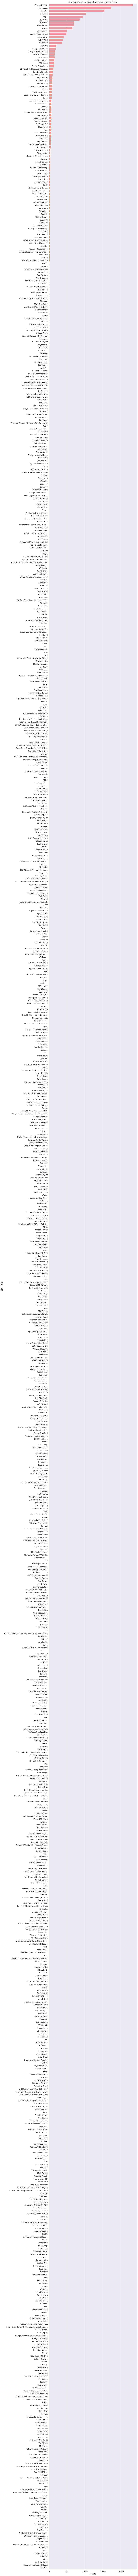

In [40]:
###Finally, I am going to visualize the figures and my insights.
###In the first diagram, I want to illustrate the total usage of link titles before epidemic(2018/1/1-2020/3/23).
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize = (10,300))
chart = sns.countplot(y="Link Title",data = df2, order = df2["Link Title"].value_counts().index)
chart.set_title('The Popularities of Link Tittles Before the Epidemic')
print("The first diagram illustrates the total usage of link titles before epidemic. In this bar chart, 'Entertainment' is the most popular link tittle before the epidemic, 'my interests' and 'Youtobe' were the second and third popular links in this Period .")

The second bar chart illustrates the popular locations where the user live in before epidemic. In this bar chart, 'St Leonardos Court'(over 45000 users) is the most popular accomodation before the epidemic, while 'Edinburgh West LFC C@H' and 'Menzieshill C@H' were the second and third popular locations in this Period. 


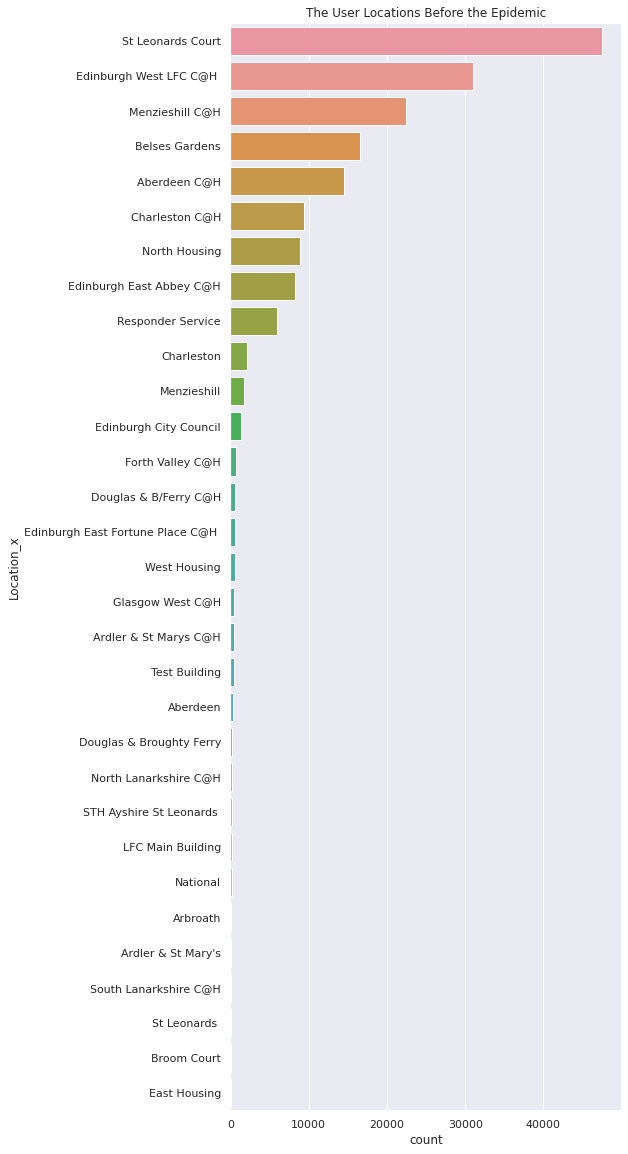

In [43]:
###In the second bar chart, it indicated the locations where the user live in before epidemic(2018/1/1-2020/3/23).
f, ax = plt.subplots(figsize = (7,20))
chart = sns.countplot(y="Location_x",data = df2, order = df2["Location_x"].value_counts().index)
chart.set_title('The User Locations Before the Epidemic')
print("The second bar chart illustrates the popular locations where the user live in before epidemic. In this bar chart, 'St Leonardos Court'(over 45000 users) is the most popular accomodation before the epidemic, while 'Edinburgh West LFC C@H' and 'Menzieshill C@H' were the second and third popular locations in this Period. ")

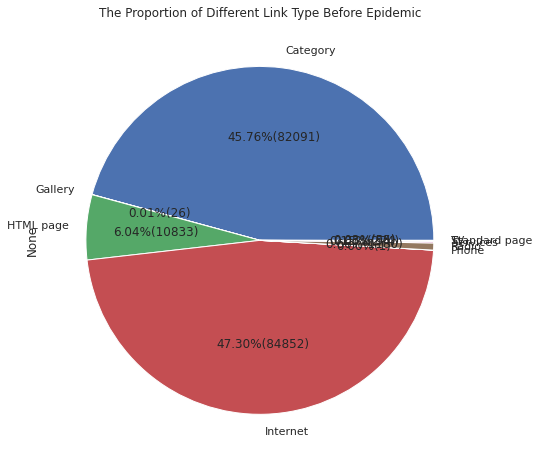

In the third pie chart, it demonstrate the number and the proportion of defferent link type. It shows that 'Internet'(84852) was the most popular link type before epidemic, while 'Category'(82091) and 'HTMI page'(10833) are the second and the third popular link type in this period.


In [48]:
###In the third pie chart, it demonstrate the number and the proportion of defferent link type.
ltdf = df2.groupby('Link  Type').size()
sns.set()
ltdf.plot(kind='pie', title='The Proportion of Different Link Type Before Epidemic', figsize=[8,8],
          autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*ltdf.sum()))
plt.show()
print("In the third pie chart, it demonstrate the number and the proportion of defferent link type. It shows that 'Internet'(84852) was the most popular link type before epidemic, while 'Category'(82091) and 'HTMI page'(10833) are the second and the third popular link type in this period.")

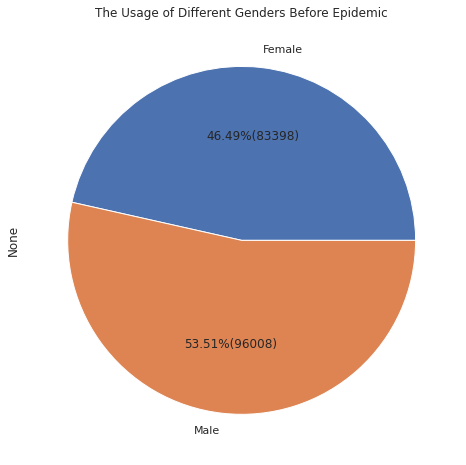

In the pie chart, it shows the number and the proportion of different gender. Before epidemic, there are more male users(96008), compared with female users(83398).


In [47]:
###In the forth pie chart, it shows the number and the proportion of different gender. 
genderdf = df2.groupby('Gender').size()
sns.set()
genderdf.plot(kind='pie', title='The Usage of Different Genders Before Epidemic', figsize=[8,8],
          autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*genderdf.sum()))
plt.show()
print("In the pie chart, it shows the number and the proportion of different gender. Before epidemic, there are more male users(96008), compared with female users(83398).")

In [21]:
###In order to analysis the age with other features, I merge three data files together and remove ones without "DateOfBirth".
df3_ = pd.merge(df, newdata3, how = "left", on = ["ExternalID"])
newdf3= df3_.dropna(axis = 0, subset = ["DateOfBirth"] )
newdf3

,Time,ExternalID,Role,Location_x,Link Title,Link Type,ContentInfo,URL,Birth date,Gender,Location_y,CleverCogsUserId,Gender2,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
0,3/22/20 11:59 PM,5535.0,User,St Leonards Court,Single Player Games,Category,NaN,NaN,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...,1416.0,F,1955/11/25,66.0,NaN,NaN
1,3/22/20 11:58 PM,5535.0,User,St Leonards Court,Tablet Games,Category,NaN,NaN,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...,1416.0,F,1955/11/25,66.0,NaN,NaN
2,3/22/20 11:58 PM,5535.0,User,St Leonards Court,Single Player Games,Category,NaN,NaN,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...,1416.0,F,1955/11/25,66.0,NaN,NaN
3,3/22/20 11:58 PM,5535.0,User,St Leonards Court,Play Games,Category,NaN,NaN,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...,1416.0,F,1955/11/25,66.0,NaN,NaN
6,3/22/20 10:59 PM,5207.0,User,Edinburgh West LFC C@H,Play Games,Category,NaN,NaN,11/26/53 12:00 AM,Female,National/EAST /Edinburgh City Council/Edinburg...,1339.0,F,1953/11/26,68.0,NaN,Elderly Care/Support
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306635,1/28/19 1:20 PM,5541.0,User,St Leonards Court,Game of Thrones YouTube,TV,NaN,https://www.youtube.com/user/GameofThrones,2/18/54 12:00 AM,Male,National/WEST /South Ayrshire Council/South Ay...,1417.0,M,1954/2/18,67.0,Poor mobility ...,Cerebral Palsy
306636,1/28/19 1:19 PM,5541.0,User,St Leonards Court,Game of Thrones,TV,NaN,https://www.hbo.com/game-of-thrones,2/18/54 12:00 AM,Male,National/WEST /South Ayrshire Council/South Ay...,1417.0,M,1954/2/18,67.0,Incontinence ...,Cerebral Palsy
306637,1/28/19 1:19 PM,5541.0,User,St Leonards Court,Game of Thrones,TV,NaN,https://www.hbo.com/game-of-thrones,2/18/54 12:00 AM,Male,National/WEST /South Ayrshire Council/South Ay...,1417.0,M,1954/2/18,67.0,Poor mobility ...,Cerebral Palsy
306638,1/28/19 12:36 PM,5709.0,User,Edinburgh East Abbey C@H,Game of Thrones YouTube,TV,NaN,https://www.youtube.com/user/GameofThrones,12/31/64 12:00 AM,Female,National/EAST /Edinburgh City Council/Edinburg...,1613.0,F,1964/12/31,57.0,Spina Bifida ...,Lifelong Mobility Issues


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


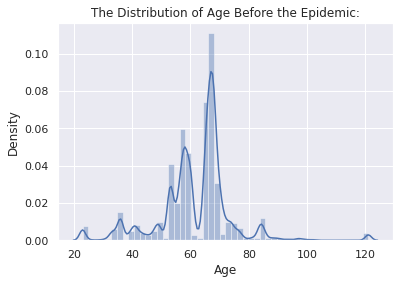

The bar chart illustrates that the distribution of users is concentrated between 50 and 70 years old, with the oldest users over 120 years old.


In [45]:
###I want to use a distribution map to show the age structure of the users.
chart = sns.distplot(newdf3['Age'])
chart.set_title('The Distribution of Age Before the Epidemic:')
plt.show()
print("The bar chart illustrates that the distribution of users is concentrated between 50 and 70 years old, with the oldest users over 120 years old.")

The box chart shows the relationship among age, sex and CareSysCondition. As we can see from the chart, 'Eldrly Care/Suppot', 'mental health issues', COPD and Dementia are the highest age limit for Caresys Condition. And the lowest age limit is Brain Injuryher and Cerebral Palsy, who are younger than 30 years old. And there is another interesting thing that the male are more likely to have the medical condition than the female, except the 'Lifelong Mobility Issue'.


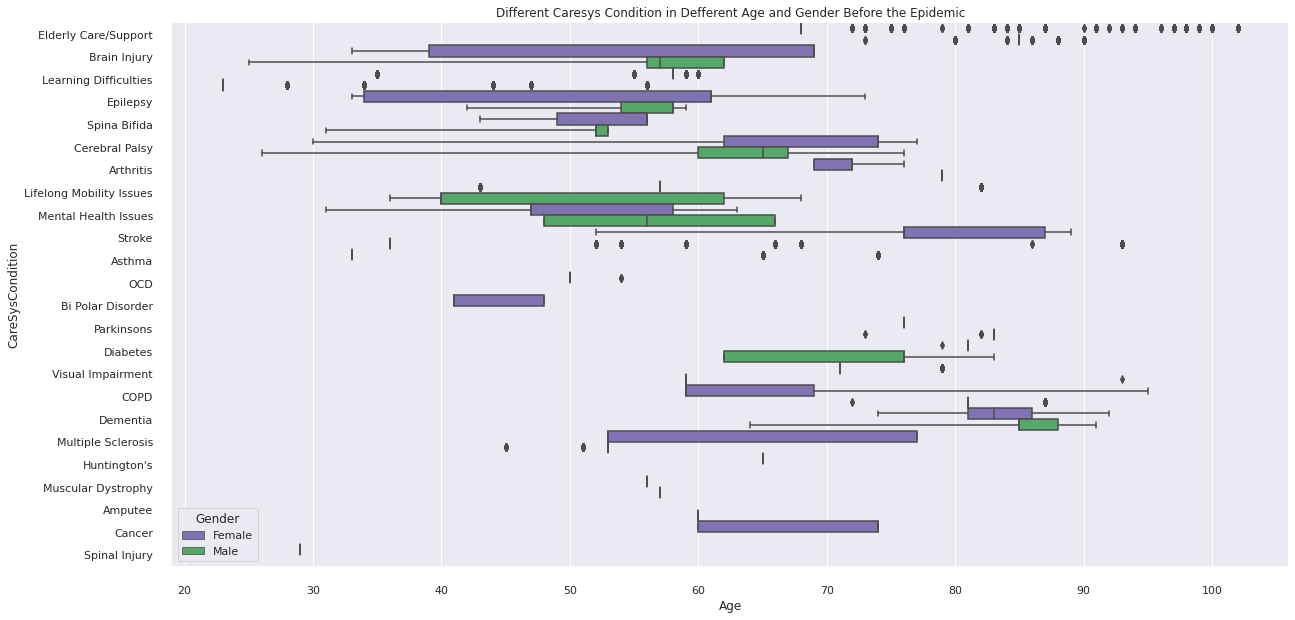

In [51]:
###I use the box chart to show the relationships among age, sex and CareSysCondition. 
f, ax = plt.subplots(figsize = (20,10))
chart = sns.boxplot(x="Age", y="CareSysCondition",
            hue="Gender", palette=["m", "g"],
            data=newdf3, width=1, saturation=75, whis=150)
sns.despine(offset=10, trim=True)
chart.set_title('Different Caresys Condition in Defferent Age and Gender Before the Epidemic')
print("The box chart shows the relationship among age, sex and CareSysCondition. As we can see from the chart, 'Eldrly Care/Suppot', 'mental health issues', COPD and Dementia are the highest age limit for Caresys Condition. And the lowest age limit is Brain Injuryher and Cerebral Palsy, who are younger than 30 years old. And there is another interesting thing that the female are more likely to have the medical condition than the male, except the 'Lifelong Mobility Issue'.")

The box chart illustrates the relationships among age, sex and CareSysCondition. I find conditions like 'Epilepsy', 'Skin Issues' have more male users, and they all below 60 years old. However, conditions like 'Visual Impairment' have more female users which are over58 years old.


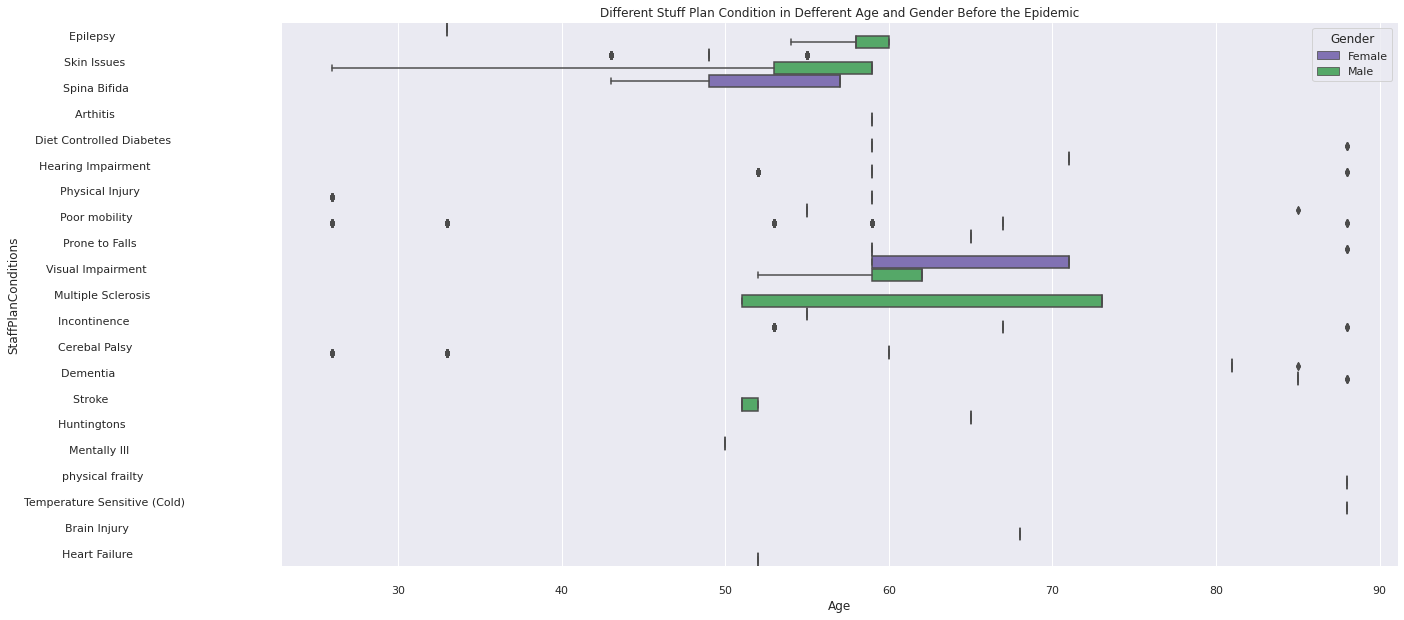

In [56]:
f, ax = plt.subplots(figsize = (20,10))
chart = sns.boxplot(x="Age", y="StaffPlanConditions",
            hue="Gender", palette=["m", "g"],
            data=newdf3, width=1, saturation=75, whis=150)
sns.despine(offset=10, trim=True)
chart.set_title('Different Stuff Plan Condition in Defferent Age and Gender Before the Epidemic')
print("The box chart illustrates the relationships among age, sex and CareSysCondition. I find conditions like 'Epilepsy', 'Skin Issues' have more male users, and they all below 60 years old. However, conditions like 'Visual Impairment' have more female users which are over58 years old.")

In [ ]:
###Reflection: I found that the box charts I got were incomplete, and some categories had too little data to trend.
###Hypothesis: It is assumed that the medical and health status and nursing conditions of users of different ages and genders are significantly different. For example, the elderly will suffer from more serious diseases, such as stroke; Female users are more likely to cause mental health problems;
###Reason: The older the elderly, the lower the body resistance, more prone to serious diseases, and different diseases may lead to a series of complications. In the chart, the incidence of diseases such as COPD and Dementia in the elderly is significantly higher than that of other diseases, indicating that some diseases tend to the elderly more.
###Test: First, consult the literature and ask professional doctors whether these diseases have the trend of aging. Then, sample interview data owners and design algorithms to verify from their start point of onset, onset stage, onset time and other multidimensional dimensions.